In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv('/content/drive/MyDrive/kaggle dataset/mechanical/MatNavi Mechanical properties of low-alloy steels.csv')

In [6]:
df

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,400,316,489,26,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,350,268,632,28,65
911,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,400,244,575,28,68
912,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,450,224,500,29,72
913,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,500,209,428,30,78


In [7]:
df.columns

Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

from the above dataframe we can conclude that properties are calculated by varing temparature and keeping alloy code constant(ie. alloy composion)

In [8]:
df[['Alloy code']].value_counts()['VbN']

10

In [9]:
alloy_properties=(df.groupby('Alloy code').mean()).sort_values(by=[' C'])
alloy_properties

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
Alloy code,,,,,,,,,,,,,,,,,,,
MBC,0.09,0.37,0.49,0.006,0.005,0.055,0.98,0.57,0.07,0.00,0.005,0.0080,0.0,0.0,377.700000,240.0,401.500000,34.1,81.700000
MBL,0.09,0.32,0.48,0.020,0.017,0.023,1.05,0.52,0.04,0.00,0.009,0.0089,0.0,0.0,377.700000,266.7,415.200000,30.5,74.800000
MBD,0.10,0.28,0.49,0.008,0.009,0.028,0.90,0.56,0.08,0.00,0.006,0.0090,0.0,0.0,377.700000,247.8,406.200000,30.0,79.300000
MBJ,0.10,0.35,0.44,0.020,0.007,0.050,1.01,0.51,0.08,0.00,0.012,0.0082,0.0,0.0,377.700000,186.0,391.000000,31.8,79.700000
MBM,0.10,0.31,0.51,0.022,0.017,0.020,1.03,0.53,0.04,0.00,0.009,0.0076,0.0,0.0,377.700000,260.2,412.700000,28.7,74.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VaG,0.29,0.26,0.76,0.009,0.007,0.450,1.12,1.18,0.07,0.23,0.003,0.0103,0.0,0.0,377.700000,529.6,645.400000,17.9,69.200000
VaR,0.30,0.27,0.70,0.012,0.012,0.440,1.10,1.35,0.11,0.27,0.003,0.0082,0.0,0.0,377.700000,510.2,630.200000,19.2,70.200000
VaD,0.30,0.28,0.72,0.014,0.006,0.350,0.93,1.22,0.16,0.21,0.002,0.0093,0.0,0.0,377.700000,505.1,625.800000,18.5,64.900000


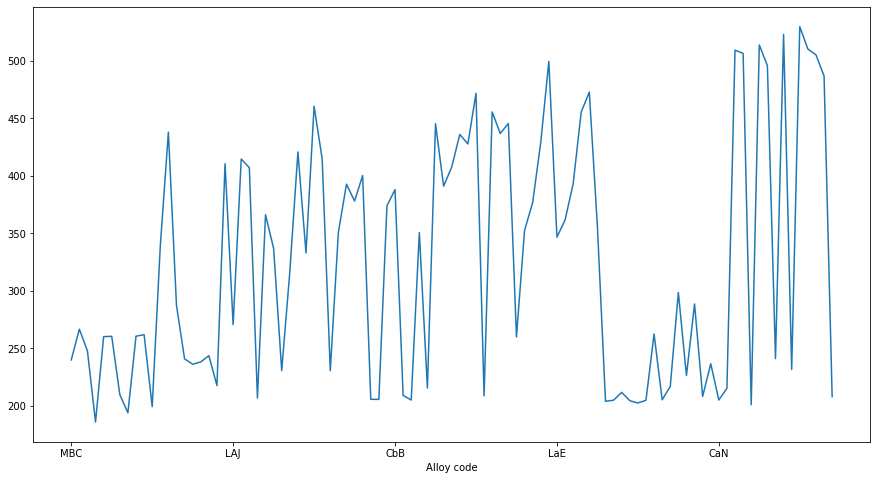

In [10]:
plt.figure(figsize=(15,8))
alloy_properties[' 0.2% Proof Stress (MPa)'].plot()

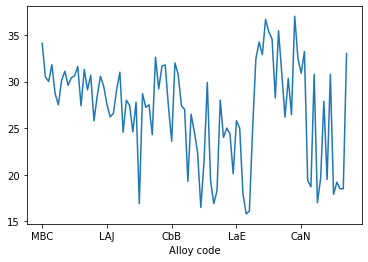

In [11]:
alloy_properties[' Elongation (%)'].plot()

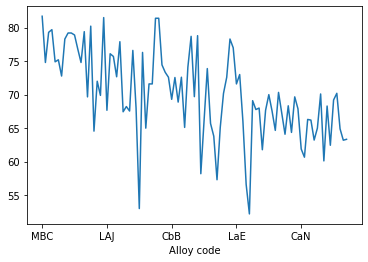

In [12]:
alloy_properties[' Reduction in Area (%)'].plot()

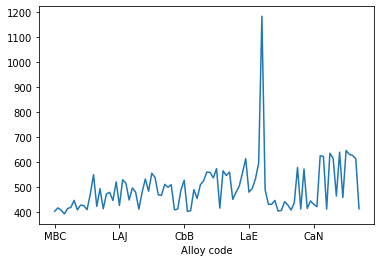

In [13]:
alloy_properties[' Tensile Strength (MPa)'].plot()

As carbon percentange increases 'elongation %' and 'reduction in area %' decreases

In [14]:
x=df.iloc[:,:-4]
y=df.iloc[:,-4:]

In [15]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3,stratify=x['Alloy code'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7cb013a910>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7cb013af90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7cb01246d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7cb0141e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7cb0141fd0>],
 'means': []}

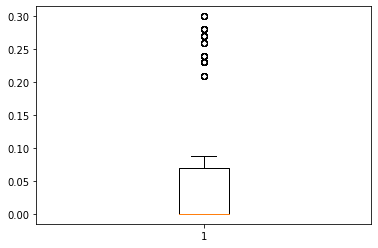

In [16]:
plt.boxplot(X_train['V'])

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss=StandardScaler()
x_train=ss.fit_transform(X_train.iloc[:,1:])
x_test=ss.transform(X_test.iloc[:,1:])

In [19]:
x_train=pd.DataFrame(x_train,columns=[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)'])
x_test=pd.DataFrame(x_test,columns=[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7cb00bbf50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7cb0043e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7cb00b01d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7cb004b990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7cb004bed0>],
 'means': []}

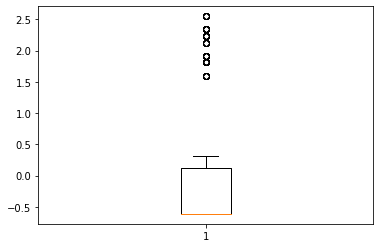

In [20]:
plt.boxplot(x_train['V'])

In [21]:
for i in range(228):
  if y_test.iloc[i,1]==6661: # beacause 6661 is a outlier
    y_test.iloc[i,1] = 661
    print(y_test.iloc[i,1])

661


In [22]:
y_test

,0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
839,402,509,27,82
269,250,365,26,76
53,203,479,23,69
821,276,364,39,90
672,262,333,20,83
...,...,...,...,...
467,352,481,24,72
262,177,268,39,83
107,240,383,28,82
851,229,330,39,78


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor

In [24]:
lmodel=LinearRegression()
lmodel.fit(x_train,y_train)
y_predl=lmodel.predict(x_test)

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
for i in range(4):
  lMAE=mean_absolute_error(y_test.iloc[:,i],y_predl[:,i])
  lMSE=mean_squared_error(y_test.iloc[:,i],y_predl[:,i])
  lR2=r2_score(y_test.iloc[:,i],y_predl[:,i])
  print(f'{y_test.columns[i]}: lMSE {lMSE**0.5} lMAE {lMAE} lR2 {lR2}',end='\n\n')

 0.2% Proof Stress (MPa): lMSE 49.935591675458326 lMAE 38.992063142308616 lR2 0.8673183409646231

 Tensile Strength (MPa): lMSE 71.09276597179745 lMAE 58.68040093402704 lR2 0.7062731589633423

 Elongation (%): lMSE 6.199584007948741 lMAE 4.438116286705814 lR2 0.5380261212777233

 Reduction in Area (%): lMSE 9.022820188234876 lMAE 6.56188998846551 lR2 0.4873050051122897



R2 score is highly effected by the outliers, let's solve this problem 

In [27]:
# print(y_test.iloc[:,2],y_predl[:,2])

# plt.boxplot(y_test.iloc[:,1])
# print(y_test.max()) 
# this was to check the outlier in tensile strength beacuse there was large difference between MAE and MSE

0.2% Proof Stress (MPa)     666 

 Tensile Strength (MPa)     6661

 Elongation (%)               78

 Reduction in Area (%)        94

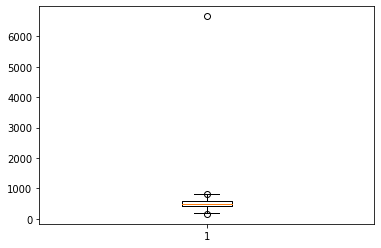

 0.2% Proof Stress (MPa)    114
 Tensile Strength (MPa)     162
 Elongation (%)              11
 Reduction in Area (%)       18
dtype: int64  0.2% Proof Stress (MPa)    666
 Tensile Strength (MPa)     820
 Elongation (%)              78
 Reduction in Area (%)       94
dtype: int64


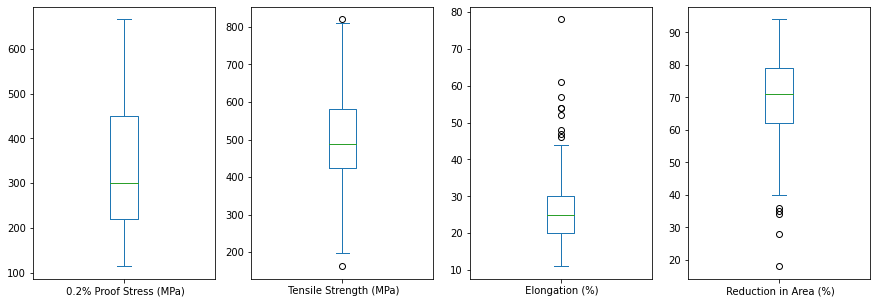

In [28]:
# plt.boxplot(y_test.iloc[:,3])
y_test.plot(subplots=True,kind='box',figsize=(15,5))
print(y_test.min(), y_test.max(),end='\n')

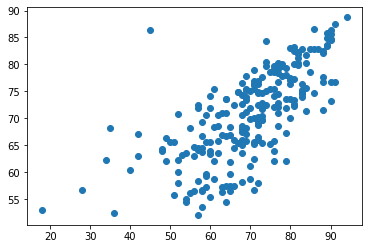

In [29]:
plt.scatter(y_test.iloc[:,3],y_predl[:,3])

In [30]:
# RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
rmodel=RandomForestRegressor()
rmodel.fit(x_train,y_train)
y_predr=rmodel.predict(x_test)

In [31]:
randomfor={}
for i in range(4):
  rMAE=mean_absolute_error(y_test.iloc[:,i],y_predr[:,i])
  rMSE=mean_squared_error(y_test.iloc[:,i],y_predr[:,i])
  rR2=r2_score(y_test.iloc[:,i],y_predr[:,i])
  # print(f'{y_test.columns[i]}: rMSE {rMSE**0.5} rMAE {rMAE} rR2 {rR2}',end='\n\n')
  randomfor[y_test.columns[i]]=[ rMSE**0.5,rMAE, rR2]
for k in randomfor:
  print(k,randomfor[k])

 0.2% Proof Stress (MPa) [26.201663252649443, 18.268122270742357, 0.9634701226124261]
 Tensile Strength (MPa) [29.598952012900874, 17.252445414847163, 0.9490850313258229]
 Elongation (%) [3.4511757378897885, 2.2318777292576417, 0.8568384240054973]
 Reduction in Area (%) [5.837886760983047, 3.561353711790393, 0.7853722831167247]


Random forest gives better result than linear regression algorithm

In [32]:
# RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
emodel=ExtraTreesRegressor()
emodel.fit(x_train,y_train)
y_prede=emodel.predict(x_test)

In [33]:
extrat={}
for i in range(4):
  eMAE=mean_absolute_error(y_test.iloc[:,i],y_prede[:,i])
  eMSE=mean_squared_error(y_test.iloc[:,i],y_prede[:,i])
  eR2=r2_score(y_test.iloc[:,i],y_prede[:,i])
  # print(f'{y_test.columns[i]}: eMSE {eMSE**0.5} eMAE {eMAE} eR2 {eR2}',end='\n\n')
  extrat[y_test.columns[i]]=[ eMSE**0.5,eMAE, eR2]
for k in extrat:
  print(k,extrat[k]) 

 0.2% Proof Stress (MPa) [31.358914864591792, 20.145065502183407, 0.9476746014216291]
 Tensile Strength (MPa) [28.944109898502557, 16.693537117903926, 0.9513129782826943]
 Elongation (%) [3.4285988328079267, 2.2308296943231443, 0.8587053664804465]
 Reduction in Area (%) [5.852858145523068, 3.5600000000000005, 0.7842700368865609]


extra trees regressor works better for Elongation than random forest, other values are similar

In [34]:
# RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
adaboost={}
for i in range(4):
  amodel=AdaBoostRegressor()
  amodel.fit(x_train,y_train.iloc[:,i])
  y_preda=amodel.predict(x_test)
  aMAE=mean_absolute_error(y_test.iloc[:,i],y_preda)
  aMSE=mean_squared_error(y_test.iloc[:,i],y_preda)
  aR2=r2_score(y_test.iloc[:,i],y_preda)
  adaboost[y_test.columns[i]]=[ aMSE**0.5,aMAE, aR2]
print(adaboost)

{' 0.2% Proof Stress (MPa)': [63.66838767852423, 49.6219835496283, 0.7843059340860637], ' Tensile Strength (MPa)': [47.07022193525028, 37.09752506655153, 0.8712387145463728], ' Elongation (%)': [4.534248523941486, 3.505500280144735, 0.7528828071053778], ' Reduction in Area (%)': [7.5804690923030735, 5.775367641939695, 0.6381182888304893]}


In [35]:
for k in adaboost:
  print(k,adaboost[k]) 

 0.2% Proof Stress (MPa) [63.66838767852423, 49.6219835496283, 0.7843059340860637]
 Tensile Strength (MPa) [47.07022193525028, 37.09752506655153, 0.8712387145463728]
 Elongation (%) [4.534248523941486, 3.505500280144735, 0.7528828071053778]
 Reduction in Area (%) [7.5804690923030735, 5.775367641939695, 0.6381182888304893]


In [36]:
# RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
GradientBoost={}
for i in range(4):
  gmodel=GradientBoostingRegressor()
  gmodel.fit(x_train,y_train.iloc[:,i])
  y_predg=gmodel.predict(x_test)
  gMAE=mean_absolute_error(y_test.iloc[:,i],y_predg)
  gMSE=mean_squared_error(y_test.iloc[:,i],y_predg)
  gR2=r2_score(y_test.iloc[:,i],y_predg)
  GradientBoost[y_test.columns[i]]=[ gMSE**0.5,gMAE, gR2]
for k in GradientBoost:
  print(k,GradientBoost[k])

 0.2% Proof Stress (MPa) [23.805178382057484, 16.956667443050968, 0.9698468024240239]
 Tensile Strength (MPa) [30.161034601154597, 18.13077532415173, 0.9471329251496725]
 Elongation (%) [3.6487740034067464, 2.343985863824483, 0.839975583823927]
 Reduction in Area (%) [5.574069166574512, 3.478872097364824, 0.8043322822983328]


gradient boost gives better result for Proof Stress than all of the above

In [37]:
s={} 
for i in range(4):
  smodel=SVR()
  smodel.fit(x_train,y_train.iloc[:,i])
  y_preds=smodel.predict(x_test)
  sMAE=mean_absolute_error(y_test.iloc[:,i],y_preds)
  sMSE=mean_squared_error(y_test.iloc[:,i],y_preds)
  sR2=r2_score(y_test.iloc[:,i],y_preds)
  s[y_test.columns[i]]=[ sMSE**0.5,sMAE, sR2]
for k in s:
  print(k,s[k])

 0.2% Proof Stress (MPa) [112.55238292756017, 88.72639861696415, 0.32593794287836964]
 Tensile Strength (MPa) [117.80764604642036, 92.14984180702547, 0.19343426467852354]
 Elongation (%) [6.495560253791939, 3.9471930292058803, 0.4928627015258411]
 Reduction in Area (%) [9.301384809542208, 6.647858900766874, 0.45515910633143875]


In [38]:
from sklearn.tree import DecisionTreeRegressor
dmodel=DecisionTreeRegressor()
dmodel.fit(x_train,y_train)

DecisionTreeRegressor()

In [39]:
y_predd=dmodel.predict(x_test)
for i in range(4):
  dMAE=mean_absolute_error(y_test.iloc[:,i],y_predd[:,i])
  dMSE=mean_squared_error(y_test.iloc[:,i],y_predd[:,i])
  dR2=r2_score(y_test.iloc[:,i],y_predd[:,i])
  print(f'{y_test.columns[i]}: rMSE {dMSE**0.5} rMAE {dMAE} rR2 {dR2}',end='\n\n')

 0.2% Proof Stress (MPa): rMSE 51.557192561305094 rMAE 26.746724890829693 rR2 0.8585610529636412

 Tensile Strength (MPa): rMSE 41.23894585245644 rMAE 24.475982532751093 rR2 0.9011656472750376

 Elongation (%): rMSE 5.052129993106759 rMAE 3.3755458515283845 rR2 0.6932098904086104

 Reduction in Area (%): rMSE 8.67360600027664 rMAE 5.318777292576419 rR2 0.5262231312698507



In [40]:
histGradientBoost={}
for i in range(4):
  hmodel=HistGradientBoostingRegressor()
  hmodel.fit(x_train,y_train.iloc[:,i])
  y_predh=hmodel.predict(x_test)
  hMAE=mean_absolute_error(y_test.iloc[:,i],y_predh)
  hMSE=mean_squared_error(y_test.iloc[:,i],y_predh)
  hR2=r2_score(y_test.iloc[:,i],y_predh)
  histGradientBoost[y_test.columns[i]]=[ hMSE**0.5,hMAE, hR2]
for k in histGradientBoost:
  print(k,histGradientBoost[k]) #randomfor,extrat,adaboost,GradientBoost,s,histGradientBoost

 0.2% Proof Stress (MPa) [25.399723183071394, 16.318502914100286, 0.9656720032751347]
 Tensile Strength (MPa) [27.27694696815775, 14.456407913021563, 0.9567601348982736]
 Elongation (%) [3.63058081770258, 2.1737564607819904, 0.8415674038454826]
 Reduction in Area (%) [4.818109784586648, 2.8410943507957525, 0.8538065700223293]


In [41]:
import xgboost
from sklearn.neighbors import KNeighborsRegressor

In [42]:
xg={}
for i in range(4):
  xmodel=xgboost.XGBRegressor()
  xmodel.fit(x_train,y_train.iloc[:,i])
  y_predx=xmodel.predict(x_test)
  xMAE=mean_absolute_error(y_test.iloc[:,i],y_predx)
  xMSE=mean_squared_error(y_test.iloc[:,i],y_predx)
  xR2=r2_score(y_test.iloc[:,i],y_predx)
  xg[y_test.columns[i]]=[ xMSE**0.5,xMAE, xR2]
for k in xg:
  print(k,xg[k])

[11:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 0.2% Proof Stress (MPa) [24.305238899989455, 17.459129933186492, 0.9685666780017446]
 Tensile Strength (MPa) [30.224544835100666, 18.17142130089639, 0.9469100458357707]
 Elongation (%) [3.893325353403829, 2.4316834653829384, 0.8178061482971425]
 Reduction in Area (%) [5.670769221440432, 3.5188103888232636, 0.7974844295794421]


In [43]:
knn={}
for i in range(4):
  kmodel=KNeighborsRegressor()
  kmodel.fit(x_train,y_train.iloc[:,i])
  y_predk=kmodel.predict(x_test)
  kMAE=mean_absolute_error(y_test.iloc[:,i],y_predk)
  kMSE=mean_squared_error(y_test.iloc[:,i],y_predk)
  kR2=r2_score(y_test.iloc[:,i],y_predk)
  knn[y_test.columns[i]]=[ kMSE**0.5,kMAE, kR2]
for k in knn:
  print(k,knn[k])

 0.2% Proof Stress (MPa) [46.76321848012696, 30.765065502183404, 0.8836411874073203]
 Tensile Strength (MPa) [64.50513807773724, 48.10480349344978, 0.7581860060932193]
 Elongation (%) [5.658768363225896, 3.692576419213974, 0.6151104188144951]
 Reduction in Area (%) [7.7603290795932605, 5.494323144104802, 0.6207420015870972]


In [44]:
from lightgbm import LGBMRegressor

In [45]:
lgb={}
for i in range(4):
  kmodel=LGBMRegressor()
  kmodel.fit(x_train,y_train.iloc[:,i])
  y_predk=kmodel.predict(x_test)
  kMAE=mean_absolute_error(y_test.iloc[:,i],y_predk)
  kMSE=mean_squared_error(y_test.iloc[:,i],y_predk)
  kR2=r2_score(y_test.iloc[:,i],y_predk)
  lgb[y_test.columns[i]]=[ kMSE**0.5,kMAE, kR2]
for k in lgb:
  print(k,lgb[k])  #randomfor,extrat,adaboost,GradientBoost,s,histGradientBoost,xg,lgb

 0.2% Proof Stress (MPa) [25.561193867392593, 16.301160186729316, 0.965234157247929]
 Tensile Strength (MPa) [27.329006845209662, 14.381114308973064, 0.9565949250443414]
 Elongation (%) [3.6209312183723856, 2.1643041805463104, 0.8424084700343294]
 Reduction in Area (%) [4.924736555314225, 2.893837239112123, 0.8472643283643296]


Regression using Neural Network

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [47]:
# Building the Neural Network

model = Sequential()
model.add(Dense(units = 15, kernel_initializer = 'normal', activation = 'tanh', input_dim = 15))
model.add(Dense(units = 30, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 45, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 40, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 30, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 20, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 4, kernel_initializer = 'normal', activation = 'tanh'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [48]:
history = model.fit(x_train, y_train, batch_size = 256, shuffle=True, epochs = 2000)
y_nn_pred = model.predict(x_test)

Epoch 1/2000
3/3 [==============================] - 1s 11ms/step - loss: 95116.9297 - mean_squared_error: 95116.9297
Epoch 2/2000
3/3 [==============================] - 0s 7ms/step - loss: 95114.9609 - mean_squared_error: 95114.9609
Epoch 3/2000
3/3 [==============================] - 0s 8ms/step - loss: 95112.7500 - mean_squared_error: 95112.7500
Epoch 4/2000
3/3 [==============================] - 0s 6ms/step - loss: 95110.1094 - mean_squared_error: 95110.1094
Epoch 5/2000
3/3 [==============================] - 0s 9ms/step - loss: 95106.8203 - mean_squared_error: 95106.8203
Epoch 6/2000
3/3 [==============================] - 0s 11ms/step - loss: 95102.4453 - mean_squared_error: 95102.4453
Epoch 7/2000
3/3 [==============================] - 0s 9ms/step - loss: 95096.2656 - mean_squared_error: 95096.2656
Epoch 8/2000
3/3 [==============================] - 0s 6ms/step - loss: 95086.9844 - mean_squared_error: 95086.9844
Epoch 9/2000
3/3 [==============================] - 0s 5ms/step - loss

In [49]:
y_nn_pred

array([[0.9999246 , 0.9999278 , 0.9998939 , 0.9999196 ],
       [0.99992466, 0.9999278 , 0.9998939 , 0.9999196 ],
       [0.9999246 , 0.9999279 , 0.99989396, 0.9999196 ],
       [0.9999246 , 0.9999278 , 0.9998939 , 0.9999196 ],
       [0.99992466, 0.9999279 , 0.9998939 , 0.9999196 ],
       [0.9999246 , 0.9999277 , 0.99989396, 0.9999197 ],
       [0.99992466, 0.9999279 , 0.9998939 , 0.9999197 ],
       [0.9999246 , 0.9999278 , 0.9998939 , 0.9999196 ],
       [0.9999246 , 0.9999278 , 0.9998939 , 0.9999196 ],
       [0.9999246 , 0.9999278 , 0.99989396, 0.9999196 ],
       [0.9999246 , 0.9999279 , 0.99989396, 0.9999196 ],
       [0.99992466, 0.9999279 , 0.9998939 , 0.9999196 ],
       [0.9999248 , 0.9999278 , 0.9998939 , 0.9999196 ],
       [0.99992466, 0.9999278 , 0.9998938 , 0.9999197 ],
       [0.9999246 , 0.9999278 , 0.9998938 , 0.9999197 ],
       [0.99992466, 0.9999278 , 0.99989396, 0.9999197 ],
       [0.9999246 , 0.9999279 , 0.99989396, 0.9999197 ],
       [0.99992466, 0.9999279 ,